# Статистический анализ данных

In [ ]:
import pandas as pd
import json
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
# !gdown --id 12ZK2_dILTS_22sNFtIOT7MjaojKPOQoo
# !gdown --id 1TeAXhAVS7TjFVpibo1Td_i-Xo5ZW3kt2

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10


In [7]:
list_names = [
    'df_may_it',
    'df_june_it'
]

df_may_it, df_june_it = [pd.read_csv(f'{df}.csv') for df in list_names]

df_may_it['skills'] = df_may_it['skills'].apply(lambda x: ast.literal_eval(x))
df_may_it['specializations'] = df_may_it['specializations'].apply(lambda x: ast.literal_eval(x))

df_june_it['skills'] = df_june_it['skills'].apply(lambda x: ast.literal_eval(x))
df_june_it['specializations'] = df_june_it['specializations'].apply(lambda x: ast.literal_eval(x))

##  1. Структурирование данных

In [9]:
df = pd.concat([df_may_it, df_june_it]).drop_duplicates().dropna().drop("key_skills", axis=1)
df = df[(df['salary'] < 500000) & (df['salary'] > 9999)]
df.head(5)

,name,salary,schedule,experience,specializations,region,skills
0,Тестировщик.Net,37500.000,Полный день,От 1 года до 3 лет,"((Программирование, Разработка, Информационные...",Астраханская область,"(SQL, тестирование, C#, api, Git)"
2,Специалист по защите информации,20000.000,Полный день,Нет опыта,"((Компьютерная безопасность, Информационные те...",Астраханская область,"(компьютер, диагностика пк, работа в условиях ..."
3,Специалист по защите информации,17500.000,Полный день,Нет опыта,"((Компьютерная безопасность, Информационные те...",Астраханская область,()
4,Специалист по защите информации,27000.000,Полный день,Нет опыта,"((Компьютерная безопасность, Информационные те...",Астраханская область,"(грамотная речь, работа с большим объемом инфо..."
5,Специалист по информационной безопасности,15000.000,Полный день,От 3 до 6 лет,"((Компьютерная безопасность, Информационные те...",Астраханская область,()


## 2. Анализ типов данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17282 entries, 0 to 24388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             17282 non-null  object 
 1   salary           17282 non-null  float64
 2   schedule         17282 non-null  object 
 3   experience       17282 non-null  object 
 4   specializations  17282 non-null  object 
 5   region           17282 non-null  object 
 6   skills           17282 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


#### Типы данных для датасета:<br>
* name - Категориальные
* salary - Количественные
* schedule - Категориальные
* experience - Порядковые
* skills - Категориальные
* specializations - Категориальные
* region - Категориальные

## 3. Визуализация данных

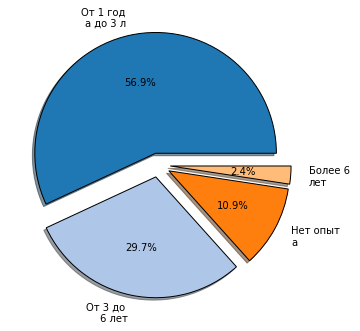

In [11]:
# Функция отрисовки диаграммы.
def print_pie(list_df, main_title=None, sub_title=None, size=10, figsize=(16, 30), legend=True):
    subplt_columns = 2
    if isinstance(list_df, (pd.DataFrame, pd.Series)):
        list_df = [list_df]
        subplt_columns = 1
    if sub_title is None:
        sub_title = [''] * len(list_df)
    explode = [0.10 for _ in range(size)]

    colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
    color_dict = {}
    index = 0

    plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    if not main_title is None:
        plt.suptitle(f'{main_title} ТОП-{size}', y=0.92, fontsize=30)

    for numb in range(len(list_df)):

        plt.subplot(3, subplt_columns, numb + 1)

        data = list_df[numb].value_counts()[:size]
        labels = list_df[numb].value_counts()[:size].index

        for i in data.index:
            if color_dict.get(i) is None:
                color_dict[i] = colors[index]
                index += 1
        
        plt.pie(data, labels=['\n'.join([s[i:i + 8] for i in range(0, len(s), 8)]) for s in labels.str[:16]],
                autopct='%.1f%%', colors=[color_dict[key] for key in data.index],
                wedgeprops={'edgecolor': 'black', 'linestyle': '-', 'antialiased': True},
                labeldistance=1.15, explode=explode, shadow=True)
        plt.title(sub_title[numb], y=1.07)
        if legend:
            plt.legend(labels=labels, loc='upper center',
                       bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.show()

print_pie(df['experience'],
          size=4,
          figsize=(16, 20),
          legend=False)

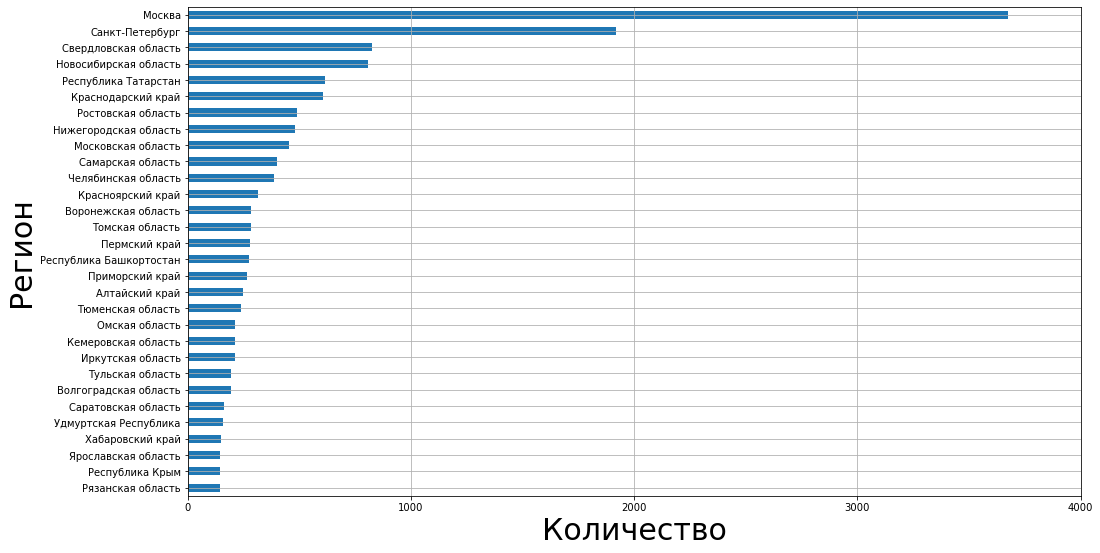

In [18]:
plt.figure(figsize=(16, 9))
df['region'].value_counts()[:30][::-1].plot.barh()

plt.grid()
plt.xticks(ticks=[i * 1000 for i in range(16)])
plt.ylabel('Регион', fontsize=30)
plt.xlabel('Количество', fontsize=30)
plt.axis(xmin=0, xmax=4000)
plt.show()

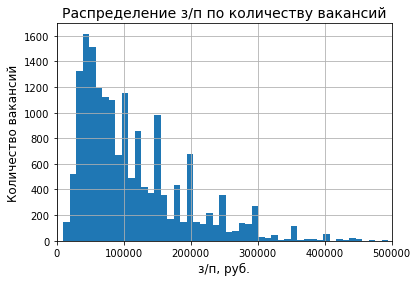

In [19]:
df['salary'].hist(bins=50)
plt.title("Распределение з/п по количеству вакансий", fontsize=14)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xlabel('з/п, руб.', fontsize=12)
plt.xlim((0, 500000))
plt.show()

## 4. Гипотеза о виде распределения

#### Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

In [20]:
# Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)
print(f"Коэффициент асимметрии - {df['salary'].skew()}")

# Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)
print(f"Коэффициент эксцесса - {df['salary'].kurtosis()}")

# Тест д'Агостино
print(stats.normaltest(df['salary']))

Коэффициент асимметрии - 1.321250915027753
Коэффициент эксцесса - 1.6637165430552812
NormaltestResult(statistic=3692.8441946164057, pvalue=0.0)


#### Данная выборка не подчиняется нормальному распределению

# 5. Оценка связи между показателями

### 1. Гипотеза Н0: статистически значимые отличия в группах (опыт работы) отсутсвуют

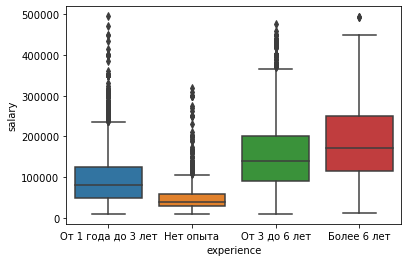

In [22]:
sns.boxplot(x='experience', y='salary', data=df)
plt.show()

In [23]:
stats.mstats.kruskalwallis(*[df[df['experience'] == exp]['salary'].values for exp in df['experience'].unique()])

KruskalResult(statistic=4326.472070829372, pvalue=0.0)

#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно опыт работы значительно влияет заработную плату.

### 2. Гипотеза Н0: статистически значимые отличия в группах (регион) отсутсвуют

In [42]:
df_region_d = pd.get_dummies(df['region'])
name_to_code_region = {item: f'r{i}' for i, item in enumerate(df_region_d.columns)}
code_to_name_region = {f'r{i}': item for i, item in enumerate(df_region_d.columns)}
df_region_d.rename(columns=name_to_code_region, inplace=True)
df_regression = pd.concat([df['salary'], df_region_d], axis=1)

df_regression.head(2)

,salary,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79
0,37500.000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(), header=None, index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.137
Model:,OLS,Adj. R-squared:,0.133
Method:,Least Squares,F-statistic:,34.600
Date:,"Thu, 15 Dec 2022",Prob (F-statistic):,0.000
Time:,00:51:32,Log-Likelihood:,-217790.000
No. Observations:,17282,AIC:,435700.000
Df Residuals:,17202,BIC:,436400.000
Df Model:,79,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно регион значительно влияет на заработную плату.

### 3. Гипотеза Н0: статистически значимые отличия в группах (тип занятости) отсутсвуют

In [44]:
df_schedule_d = pd.get_dummies(df['schedule'])
name_to_code_schedule = {item: f's{i}' for i, item in enumerate(df_schedule_d.columns)}
code_to_name_schedule = {f's{i}': item for i, item in enumerate(df_schedule_d.columns)}
df_schedule_d.rename(columns=name_to_code_schedule, inplace=True)
df_regression = pd.concat([df['salary'], df_schedule_d], axis=1)

df_regression.head(3)

,salary,s0,s1,s2,s3,s4
0,37500.000,0,0,1,0,0
2,20000.000,0,0,1,0,0
3,17500.000,0,0,1,0,0


In [45]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
resultsm.summary()
# Prob (F-statistic):  -- p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     441.3
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:51:43   Log-Likelihood:            -2.1802e+05
No. Observations:               17282   AIC:                         4.361e+05
Df Residuals:                   17276   BIC:                         4.361e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.729e+16   8.17e+16     -0.824      0.410   -2.27e+17    9.28e+16
s0          6.729e+16   8.17e+16      0.824      0.410   -9.28e+16    2.27e+17
s1          6.729e+16   8.17e+16      0.824      0.410   -9.28e+16    2.27e+17
s2          6.729e+16   8.17e+16      0.824      0.410   -9.28e+16    2.27e+17
s3          6.729e+16   8.17e+16      0.824      0.410   -9.28e+16    2.27e+17
s4          6.729e+16   8.17e+16      0.824      0.410   -9.28e+16    2.27e+17
==============================================================================
Omnibus:                     3746.398   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7930.687
Skew:                           1.269   Prob(JB):                         0.00
Kurtosis:                       5.138   Cond. No.                     4.61e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (тип занятости) значительно влияет на заработную плату.

### 4. Гипотеза Н0: статистически значимые отличия в группах (навыки) отсутсвуют

In [46]:
# Удалим навыки, встречающиеся реже 100 раз.
skills = df['skills'].explode('skills').value_counts()
skills = skills[skills > 100].index


def clear_skills(data):
    arr = []
    for i in data:
        if i in skills:
            arr.append(i)
    if len(arr) > 0:
        return tuple(arr)
    else:
        return np.nan


df_tmp = df.copy(deep=True)
df_tmp['skills'] = df_tmp['skills'].apply(clear_skills)
df_tmp = df_tmp.dropna()

In [47]:
mlb = MultiLabelBinarizer()

df_skills_d = pd.DataFrame(mlb.fit_transform(df_tmp['skills']), columns=mlb.classes_, index=df_tmp.index)
name_to_code_skills = {item: f'sk{i}' for i, item in enumerate(df_skills_d.columns)}
code_to_name_skills = {f'sk{i}': item for i, item in enumerate(df_skills_d.columns)}
df_skills_d.rename(columns=name_to_code_skills, inplace=True)
df_regression = pd.concat([df_tmp['salary'], df_skills_d], axis=1)

df_regression.head(2)

,salary,sk0,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,...,sk146,sk147,sk148,sk149,sk150,sk151,sk152,sk153,sk154,sk155
0,37500.000,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(), header=None, index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.373
Model:,OLS,Adj. R-squared:,0.367
Method:,Least Squares,F-statistic:,57.280
Date:,"Thu, 15 Dec 2022",Prob (F-statistic):,0.000
Time:,00:52:12,Log-Likelihood:,-188710.000
No. Observations:,15150,AIC:,377700.000
Df Residuals:,14993,BIC:,378900.000
Df Model:,156,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (навыки) значительно влияют на заработную плату.

### 4. Гипотеза Н0: статистически значимые отличия в группах (специализация) отсутсвуют

In [49]:
df_spec_d = pd.DataFrame(mlb.fit_transform(df['specializations']), columns=mlb.classes_, index=df.index)
name_to_code_spec = {item: f'sp{i}' for i, item in enumerate(df_spec_d.columns)}
code_to_name_spec = {f'sp{i}': item for i, item in enumerate(df_spec_d.columns)}
df_spec_d.rename(columns=name_to_code_spec, inplace=True)
df_regression = pd.concat([df['salary'], df_spec_d], axis=1)

df_regression.head(2)

,salary,sp0,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp157,sp158,sp159,sp160,sp161,sp162,sp163,sp164,sp165,sp166
0,37500.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(), header=None, index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.171
Model:,OLS,Adj. R-squared:,0.166
Method:,Least Squares,F-statistic:,33.860
Date:,"Thu, 15 Dec 2022",Prob (F-statistic):,0.000
Time:,00:52:29,Log-Likelihood:,-217430.000
No. Observations:,17282,AIC:,435100.000
Df Residuals:,17176,BIC:,435900.000
Df Model:,105,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (специализация) значительно влияют на заработную плату.

# Вывод: все выбранные признаки имеют высокую статистическую значимость. Наибольший коэффициент детерминации у навыков.